# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto baquerizo moreno
Processing Record 2 of Set 1 | wenchang
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | port hedland
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | linda
Processing Record 8 of Set 1 | port lincoln
Processing Record 9 of Set 1 | shahpur
Processing Record 10 of Set 1 | niamey
Processing Record 11 of Set 1 | ozernyy
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | vieux fort
Processing Record 15 of Set 1 | geraldton
Processing Record 16 of Set 1 | queenstown
Processing Record 17 of Set 1 | port mathurin
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | matao
Processing Record 20 of Set 1 | rundu
Processing Record 21 of Set 1 | toga village
City not

Processing Record 44 of Set 4 | si chiang mai
Processing Record 45 of Set 4 | pare
Processing Record 46 of Set 4 | olonkinbyen
Processing Record 47 of Set 4 | riviere-du-loup
Processing Record 48 of Set 4 | horta
Processing Record 49 of Set 4 | prokuplje
Processing Record 0 of Set 5 | mantua
Processing Record 1 of Set 5 | robertsport
Processing Record 2 of Set 5 | fortuna
Processing Record 3 of Set 5 | xichang
Processing Record 4 of Set 5 | evinayong
Processing Record 5 of Set 5 | taroa
Processing Record 6 of Set 5 | hithadhoo
Processing Record 7 of Set 5 | basco
Processing Record 8 of Set 5 | pisco
Processing Record 9 of Set 5 | kaufman
Processing Record 10 of Set 5 | umm ruwaba
Processing Record 11 of Set 5 | ta`u
Processing Record 12 of Set 5 | mhamid
Processing Record 13 of Set 5 | west island
Processing Record 14 of Set 5 | ancud
Processing Record 15 of Set 5 | parabel'
Processing Record 16 of Set 5 | kerikeri
Processing Record 17 of Set 5 | korsakov
Processing Record 18 of Set 5 

Processing Record 40 of Set 8 | gogrial
Processing Record 41 of Set 8 | paracuru
Processing Record 42 of Set 8 | kawant
Processing Record 43 of Set 8 | norton
Processing Record 44 of Set 8 | kalimpong
Processing Record 45 of Set 8 | lyantonde
Processing Record 46 of Set 8 | coxen hole
Processing Record 47 of Set 8 | tarrafal de sao nicolau
Processing Record 48 of Set 8 | mandaguacu
Processing Record 49 of Set 8 | barentu
Processing Record 0 of Set 9 | egilsstadir
Processing Record 1 of Set 9 | chernyshevsk
Processing Record 2 of Set 9 | la'ie
Processing Record 3 of Set 9 | sisimiut
Processing Record 4 of Set 9 | tilisarao
Processing Record 5 of Set 9 | chonchi
Processing Record 6 of Set 9 | auki
Processing Record 7 of Set 9 | tara
Processing Record 8 of Set 9 | tanki leendert
City not found. Skipping...
Processing Record 9 of Set 9 | jayapura
Processing Record 10 of Set 9 | las palmas
Processing Record 11 of Set 9 | ain beni mathar
City not found. Skipping...
Processing Record 12 of Se

Processing Record 28 of Set 12 | kapa'a
Processing Record 29 of Set 12 | severo-yeniseyskiy
Processing Record 30 of Set 12 | kogalym
Processing Record 31 of Set 12 | lascano
Processing Record 32 of Set 12 | belel
Processing Record 33 of Set 12 | ostersund
Processing Record 34 of Set 12 | albox
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto baquerizo moreno,-0.9000,-89.6000,299.70,74,75,4.12,EC,1696269152
1,wenchang,30.9040,118.4887,293.07,80,98,1.56,CN,1696269152
2,adamstown,-25.0660,-130.1015,293.41,73,22,10.89,PN,1696269142
3,ushuaia,-54.8000,-68.3000,280.94,45,0,4.12,AR,1696269070
4,port hedland,-20.3167,118.5667,294.18,94,8,2.06,AU,1696268854


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto baquerizo moreno,-0.9000,-89.6000,299.70,74,75,4.12,EC,1696269152
1,wenchang,30.9040,118.4887,293.07,80,98,1.56,CN,1696269152
2,adamstown,-25.0660,-130.1015,293.41,73,22,10.89,PN,1696269142
3,ushuaia,-54.8000,-68.3000,280.94,45,0,4.12,AR,1696269070
4,port hedland,-20.3167,118.5667,294.18,94,8,2.06,AU,1696268854


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

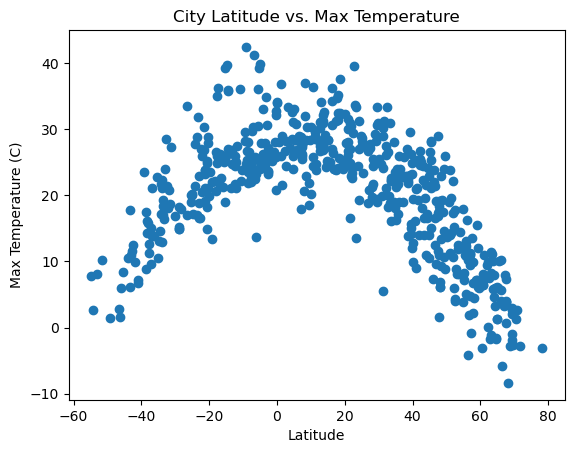

In [11]:
# Build scatter plot for latitude vs. temperature
max_temp_c = city_data_df["Max Temp"] - 273.15
plt.scatter(city_data_df["Lat"], max_temp_c)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

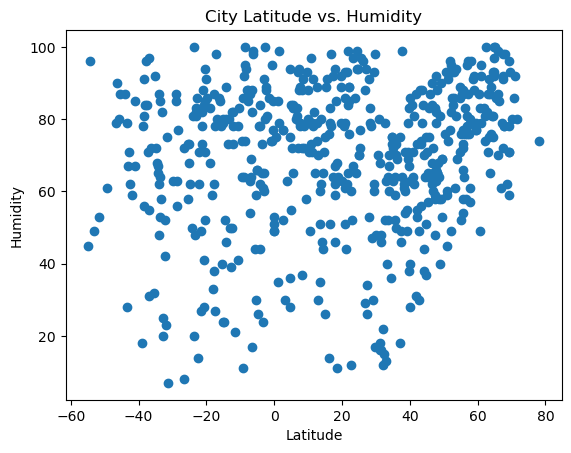

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

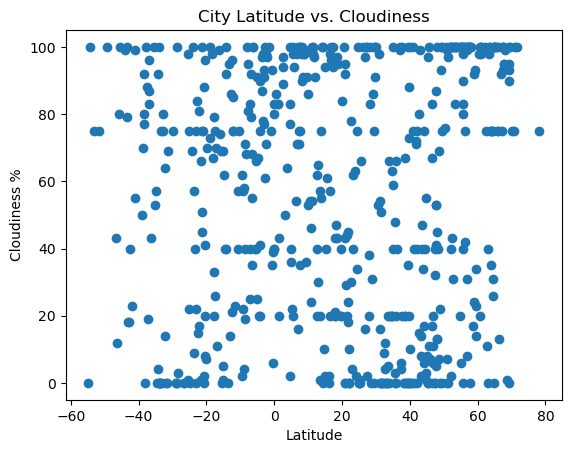

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

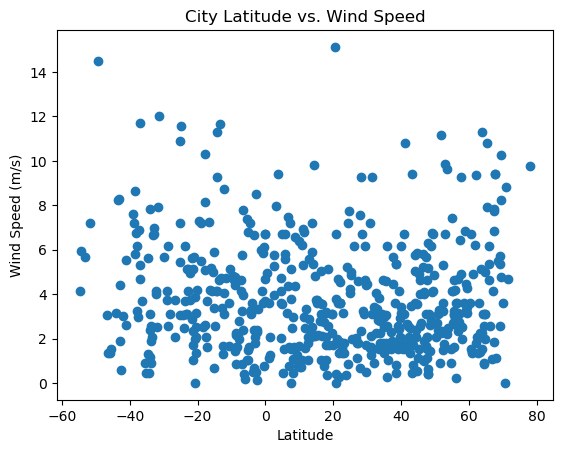

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
#def linear_regression(x , y):
 #   slope, intercept, r_value, p_value, std_err = linregress(x,y)
  #  return slope, intercept, r_value, p_value, std_err

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,wenchang,30.9040,118.4887,293.07,80,98,1.56,CN,1696269152
5,jamestown,42.0970,-79.2353,299.83,53,0,1.54,US,1696268973
6,linda,39.1277,-121.5508,296.25,55,0,1.54,US,1696269153
8,shahpur,16.7000,76.8333,297.19,78,96,3.54,IN,1696269153
9,niamey,13.5137,2.1098,304.31,51,20,2.06,NE,1696269116


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto baquerizo moreno,-0.9000,-89.6000,299.70,74,75,4.12,EC,1696269152
2,adamstown,-25.0660,-130.1015,293.41,73,22,10.89,PN,1696269142
3,ushuaia,-54.8000,-68.3000,280.94,45,0,4.12,AR,1696269070
4,port hedland,-20.3167,118.5667,294.18,94,8,2.06,AU,1696268854
7,port lincoln,-34.7333,135.8667,286.29,72,57,5.61,AU,1696269153


###  Temperature vs. Latitude Linear Regression Plot

the r-value is: 0.6961257351196153


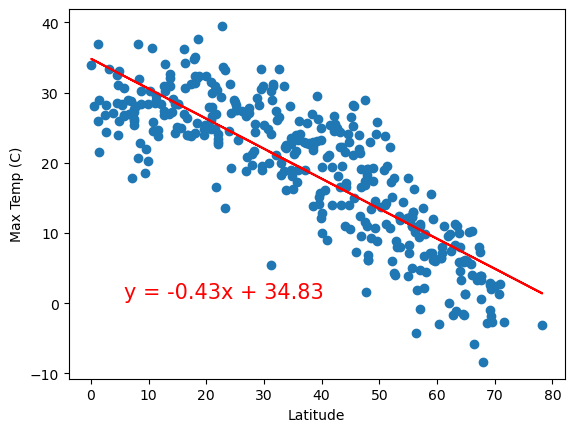

In [38]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"] - 273.15

slope, intercept, r_value, p_value, std_err = linregress(x,y)

plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
regress_value = x * slope + intercept

plt.plot(x, regress_value, color="red")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

print(f"the r-value is: {r_value**2}")

plt.show()

the r-value is: 0.5483819719809595


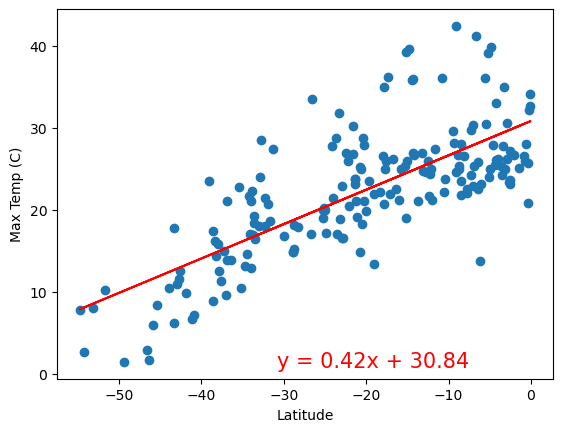

In [43]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"] - 273.15

slope, intercept, r_value, p_value, std_err = linregress(x,y)

plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
regress_value = x * slope + intercept

plt.plot(x, regress_value, color="red")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(-30.8,0.8),fontsize=15,color="red")

print(f"the r-value is: {r_value**2}")

plt.show()

**Discussion about the linear relationship:** In the North Hemisphere; as latitude increases max temp decreases, meaning that these have a negative relationship. In the South Hemisphere; as latitude increases max temp also increases, meaning that these have a positive relationship.  

### Humidity vs. Latitude Linear Regression Plot

the r-value is: 0.030572974927048933


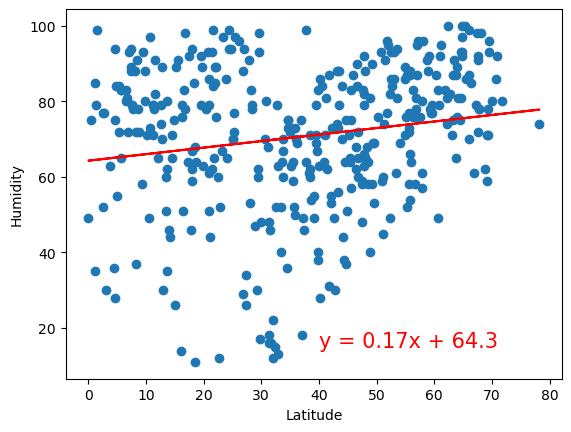

In [46]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]

slope, intercept, r_value, p_value, std_err = linregress(x,y)

plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
regress_value = x * slope + intercept

plt.plot(x, regress_value, color="red")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(40,15),fontsize=15,color="red")

print(f"the r-value is: {r_value**2}")

plt.show()

the r-value is: 0.004561056212760312


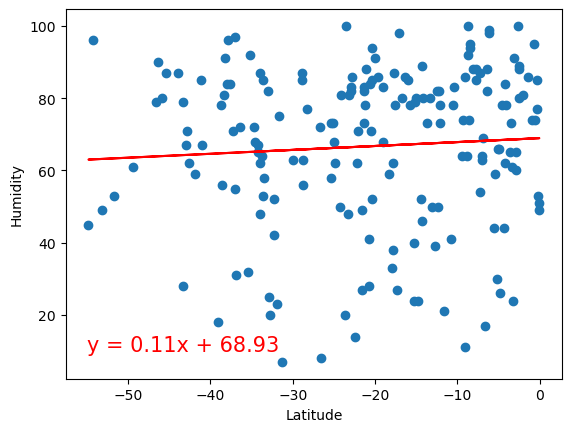

In [50]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

slope, intercept, r_value, p_value, std_err = linregress(x,y)

plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
regress_value = x * slope + intercept

plt.plot(x, regress_value, color="red")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(-55,10),fontsize=15,color="red")

print(f"the r-value is: {r_value**2}")

plt.show()

**Discussion about the linear relationship:** In both the south and north hemispheres, there is a mild positive relationship. Additionally, note that the correlation coefficient is very close to zero. 

### Cloudiness vs. Latitude Linear Regression Plot

the r-value is: 0.008058903826506626


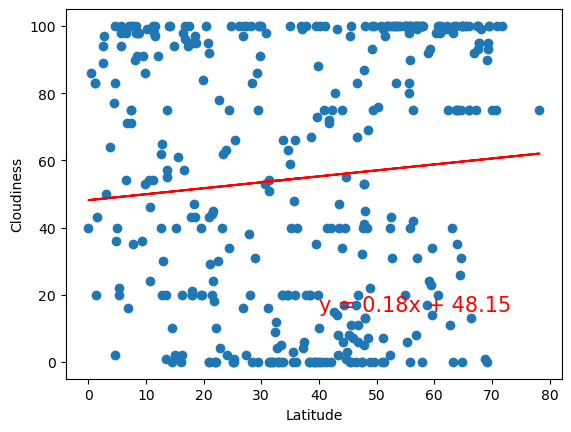

In [51]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]

slope, intercept, r_value, p_value, std_err = linregress(x,y)

plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
regress_value = x * slope + intercept

plt.plot(x, regress_value, color="red")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(40,15),fontsize=15,color="red")

print(f"the r-value is: {r_value**2}")

plt.show()

the r-value is: 0.012061370078592827


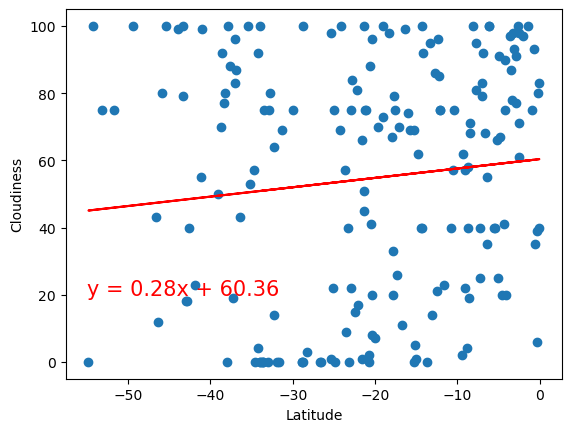

In [52]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]

slope, intercept, r_value, p_value, std_err = linregress(x,y)

plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
regress_value = x * slope + intercept

plt.plot(x, regress_value, color="red")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

print(f"the r-value is: {r_value**2}")

plt.show()

**Discussion about the linear relationship:** In both the south and north hemispheres, there is a mild positive relationship. Additionally, note that the correlation coefficient is very close to zero. 

### Wind Speed vs. Latitude Linear Regression Plot

the r-value is: 0.010979277180924752


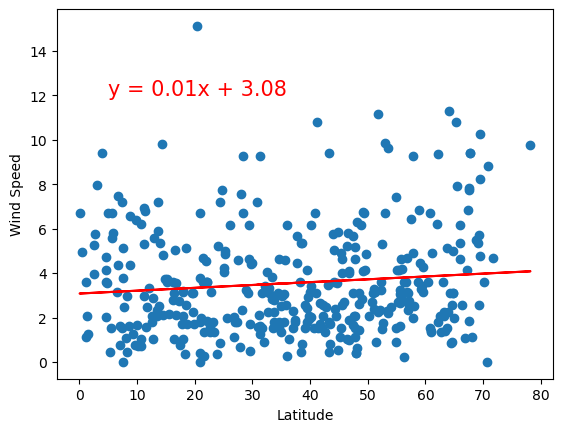

In [53]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]

slope, intercept, r_value, p_value, std_err = linregress(x,y)

plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
regress_value = x * slope + intercept

plt.plot(x, regress_value, color="red")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(5, 12),fontsize=15,color="red")

print(f"the r-value is: {r_value**2}")

plt.show()

the r-value is: 0.0330338540833926


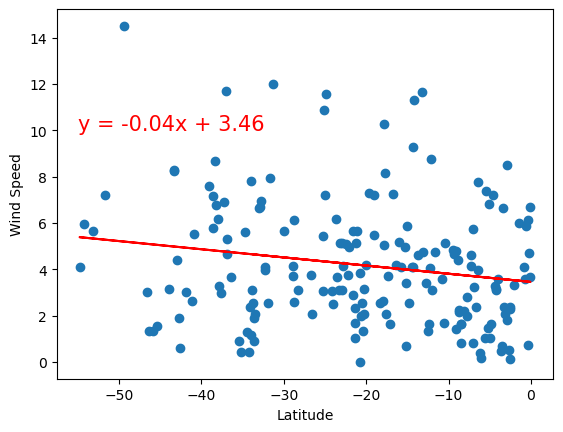

In [55]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]

slope, intercept, r_value, p_value, std_err = linregress(x,y)

plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
regress_value = x * slope + intercept

plt.plot(x, regress_value, color="red")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(-55, 10),fontsize=15,color="red")

print(f"the r-value is: {r_value**2}")

plt.show()

**Discussion about the linear relationship:** In the North Hemisphere; latitude and wind speed have a positive relationship. In the South Hemisphere; latitude and wind speed have a negative relationship. Additionally, note that the correlation coefficient is very close to zero.   